In [1]:
%pylab inline
from simulation import *
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
import sys
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.gridspec as gridspec
import os
import multiprocessing
num_cores = multiprocessing.cpu_count() - 1


Populating the interactive namespace from numpy and matplotlib


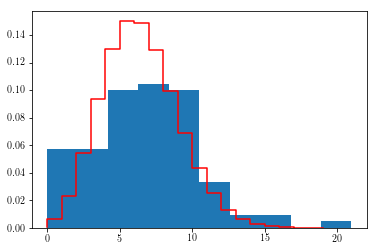

In [2]:
gamelogs2017= [file for file in os.listdir("./gamelogs/2017") if file.endswith("txt")]

gamelogs = []
gamelogs += ["./gamelogs/2017/"+file for file in gamelogs2017]
Lebron_FT  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tLeBron' in line and "free throw" in line]) for game in gamelogs]

n_ft = [len(l) for l in Lebron_FT]
poisson_mean = np.mean(n_ft)
x = np.arange(20)
g1 = poisson.pmf(x,poisson_mean)

plt.hist(n_ft, normed=True, bins=10)
plt.step(x,g1,color="red")

In [3]:
bron_0 = infer_model(Lebron_FT,["+","-"],0,0)
bron_1 = infer_model(Lebron_FT,["+","-"],1,1)

In [4]:
trajectories, _ = simulate_freethrows(bron_1[0],poisson_mean, 91)

In [5]:
def sim_one():
    trajectories, _ = simulate_freethrows(bron_1[0],poisson_mean, 91)
    crit = evaluate_models([l for l in trajectories if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])
    return(crit)

def sim_zero():
    trajectories, _ = simulate_freethrows(bron_0[0],poisson_mean, 91)
    crit = evaluate_models([l for l in trajectories if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])
    return(crit)

In [6]:
bron_0[1]

defaultdict(functools.partial(<built-in function zeros>, 2),
            {'': array([ 471.,  222.])})

In [7]:
bron_0[0]

defaultdict(functools.partial(<built-in function zeros>, 2),
            {'': array([ 0.67965368,  0.32034632])})

In [8]:
sim_zero()

{'AIC': {0: 801.80744613483557,
  1: 804.9888077389362,
  2: 808.28185761865859,
  3: 816.35035120819737},
 'DIC1': {0: 801.80215472102986,
  1: 804.92649403511064,
  2: 807.93913909696983,
  3: 814.62343007758716},
 'DIC2': {0: 801.79927580412027,
  1: 804.88733415861157,
  2: 807.78880712512444,
  3: 814.18621153788865},
 'LOO': {0: 801.73637479373519,
  1: 804.74512934043821,
  2: 807.80074757495777,
  3: 814.9680563632246},
 'LPD': {0: 799.11476360505094,
  1: 796.91484537782185,
  2: 789.46131039716522,
  3: 776.13096777546343},
 'LPPD': {0: 799.89676076702744,
  1: 799.25600624856941,
  2: 794.8079142024377,
  3: 787.63574259830659},
 'LPPDCV2': {0: 801.1159911237155,
  1: 800.77487156956022,
  2: 821.6378577535387,
  3: 828.80780736180907},
 'WAIC1': {0: 801.71364089774579,
  1: 804.66680568639788,
  2: 807.47476113623895,
  3: 813.73923381348675},
 'WAIC2': {0: 801.7360464328732,
  1: 804.7436656486866,
  2: 807.78628298118497,
  3: 814.86100202100056},
 'kDIC1': {0: 0.99695388